In [1]:
from PIL import Image
from ultralytics import YOLO
import numpy as np
from matplotlib import pyplot as plt
import cv2

In [2]:
model = YOLO('settings\\visdrone.pt')
#model = YOLO('dota8-obb.pt')
#model = YOLO('yolov8n.pt')
#model = YOLO('yolov8s.pt')
#model = YOLO('yolov8n-seg.pt')
#model = YOLO('yolov8s-seg.pt')
#model = YOLO('yolov8n-obb.pt')
#model = YOLO('yolov8s-obb.pt')
#model = YOLO('yolov8n-pose.pt')

#model = YOLO('dotav1.5.pt')

In [3]:
results = model("img\\cars-006.jpg")


image 1/1 d:\RepoDevel\DroneView\img\cars-006.jpg: 480x640 3 pedestrians, 3 cars, 1 van, 2 motors, 52.0ms
Speed: 0.0ms preprocess, 52.0ms inference, 0.0ms postprocess per image at shape (1, 3, 480, 640)


In [4]:
results

[ultralytics.engine.results.Results object with attributes:
 
 boxes: ultralytics.engine.results.Boxes object
 keypoints: None
 masks: None
 names: {0: 'pedestrian', 1: 'people', 2: 'bicycle', 3: 'car', 4: 'van', 5: 'truck', 6: 'tricycle', 7: 'awning-tricycle', 8: 'bus', 9: 'motor'}
 obb: None
 orig_img: array([[[ 75, 100,  90],
         [ 51,  76,  66],
         [ 23,  49,  43],
         ...,
         [ 36, 118, 106],
         [ 26, 110,  98],
         [ 22, 106,  94]],
 
        [[ 72,  99,  89],
         [ 46,  73,  63],
         [ 18,  45,  36],
         ...,
         [ 31, 113, 101],
         [ 24, 108,  96],
         [ 21, 105,  93]],
 
        [[ 47,  79,  68],
         [ 24,  54,  43],
         [  4,  28,  20],
         ...,
         [ 29, 111,  99],
         [ 25, 109,  97],
         [ 25, 109,  97]],
 
        ...,
 
        [[174, 119,  15],
         [174, 119,  15],
         [174, 119,  15],
         ...,
         [174, 119,  15],
         [174, 119,  15],
         [174, 11

In [5]:
results[0].boxes[0]

ultralytics.engine.results.Boxes object with attributes:

cls: tensor([3.])
conf: tensor([0.9006])
data: tensor([[605.8726, 454.5722, 722.0182, 663.5699,   0.9006,   3.0000]])
id: None
is_track: False
orig_shape: (1156, 1600)
shape: torch.Size([1, 6])
xywh: tensor([[663.9454, 559.0710, 116.1456, 208.9977]])
xywhn: tensor([[0.4150, 0.4836, 0.0726, 0.1808]])
xyxy: tensor([[605.8726, 454.5722, 722.0182, 663.5699]])
xyxyn: tensor([[0.3787, 0.3932, 0.4513, 0.5740]])

In [10]:
for r in results:
    im_array = r.plot()  # plot a BGR numpy array of predictions
    im = Image.fromarray(im_array[..., ::-1])  # RGB PIL image
    im.show()  # show image
#    im.save('results.jpg')  # save image
#    print(im_array[0])
#    print(r.boxes)
#    print(r.masks)

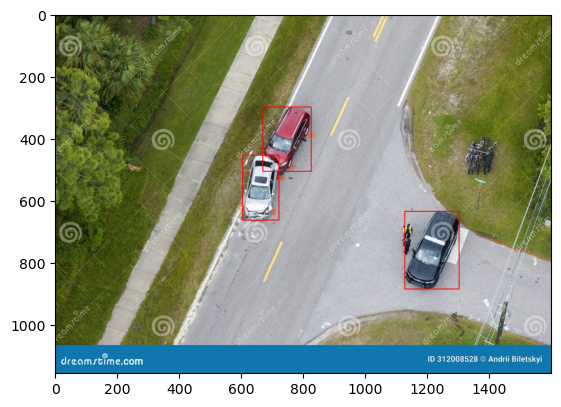

In [13]:
result_img = cv2.cvtColor(results[0].orig_img, cv2.COLOR_BGR2RGB)
for box in results[0].boxes:
    if results[0].names[box.cls.numpy()[0]] == 'car':
        bbox = box.xyxy[0].numpy(force=True)
        pt1 = (int(bbox[0]),int(bbox[1]))
        pt2 = (int(bbox[2]),int(bbox[3]))
        cv2.rectangle(result_img, pt1, pt2, (255,0,0), 2)

plt.imshow(result_img)